## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('mushrooms.csv')

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe().transpose()

count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   p  3968
spore-print-color         8124      9   w  2388
population                8124      6   v  4040
habitat                   8124      7   d  3148

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Exploratory Data Analysis

### Count of Target Variable

<Axes: xlabel='class', ylabel='count'>

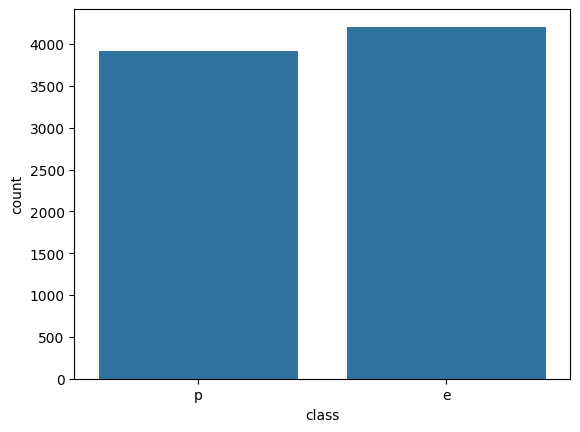

In [6]:
sns.countplot(data=df, x='class')

### Visualizing Number of Unique Features

In [7]:
unique_features = df.describe().transpose().reset_index().sort_values('unique')

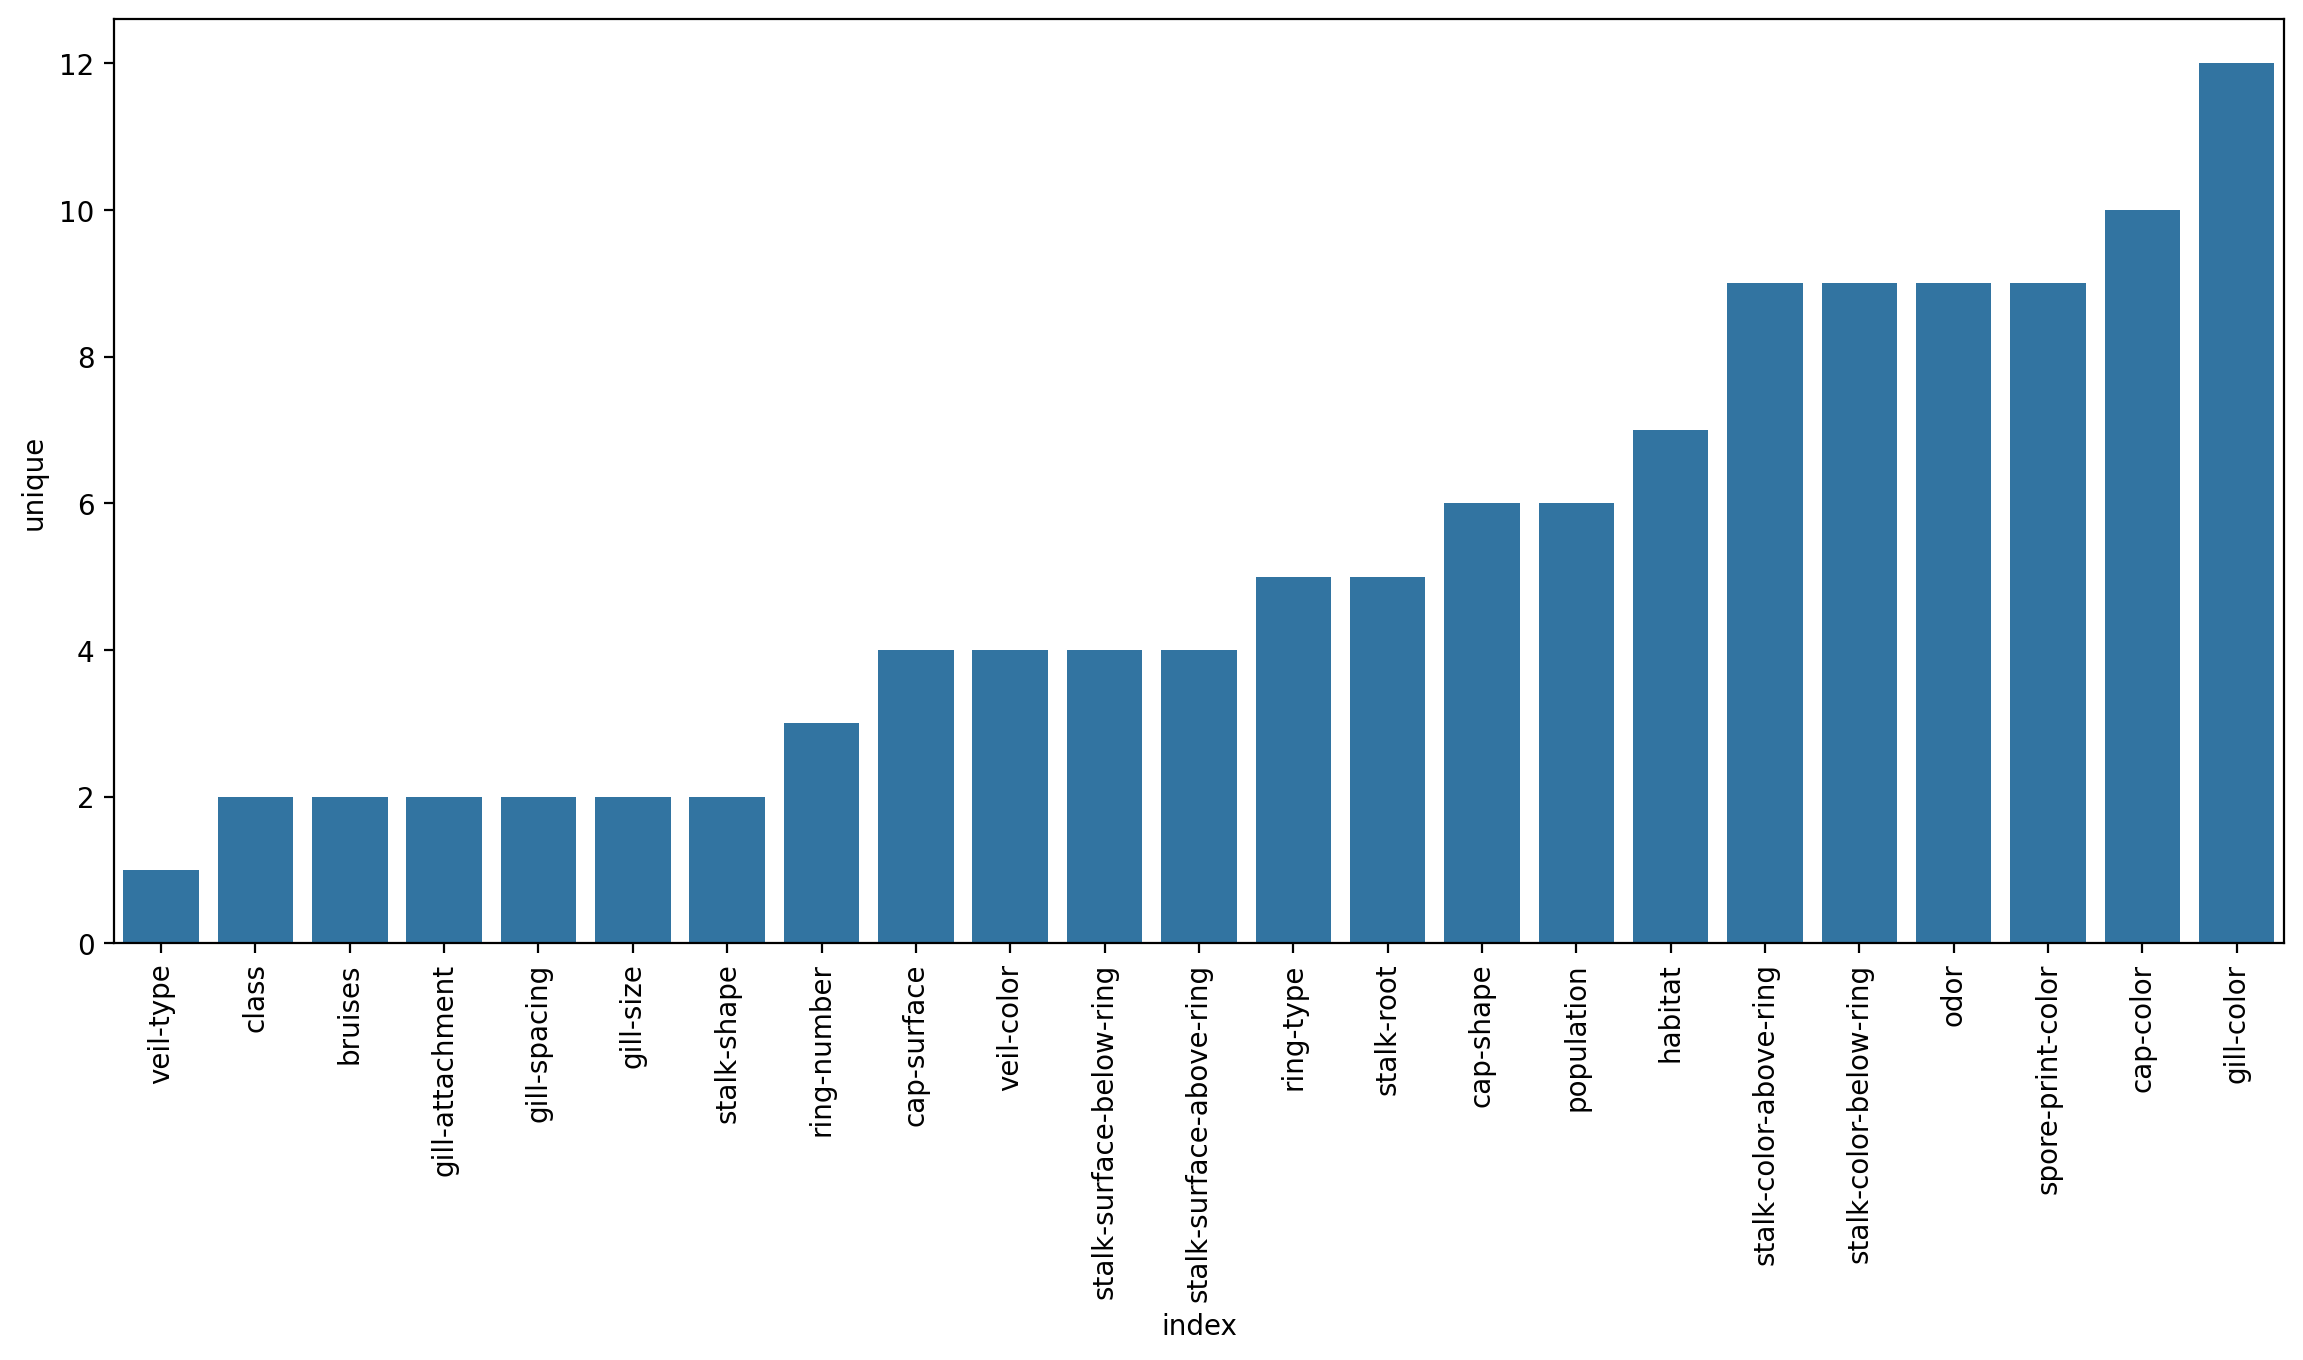

In [8]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=unique_features, x='index', y='unique')
plt.xticks(rotation=90);

## Splitting X and Y Columns

In [9]:
X = df.drop('class', axis=1)
y = df['class']

X = pd.get_dummies(X, drop_first=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Creating Model

In [11]:
model = AdaBoostClassifier(n_estimators=1)

In [12]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

### Prediction and Evaluation

In [13]:
predictions = model.predict(X_test)

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.97      0.80      0.88       637
           p       0.82      0.97      0.89       582

    accuracy                           0.88      1219
   macro avg       0.89      0.89      0.88      1219
weighted avg       0.90      0.88      0.88      1219



In [15]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
model.feature_importances_.argmax()

np.int64(22)

In [17]:
X.columns[22]

'odor_n'

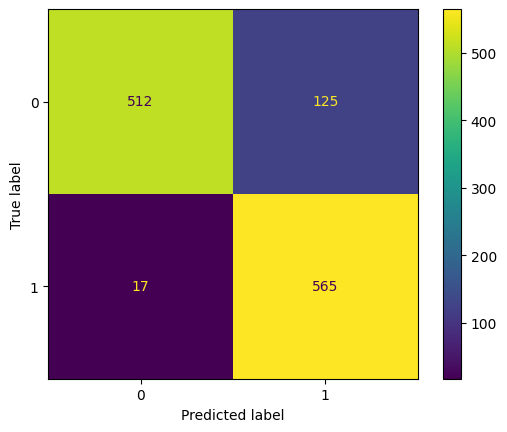

In [18]:
matrix = confusion_matrix(y_test, predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [19]:
print(f"Accuracy Score: {accuracy_score(y_test, predictions)}")
print(f"Precision Score: {precision_score(y_test, predictions, pos_label='p')}")
print(f"Recall Score: {recall_score(y_test, predictions, pos_label='p')}")
print(f"F1 Score: {f1_score(y_test, predictions, pos_label='p')}")

Accuracy Score: 0.8835110746513536
Precision Score: 0.8188405797101449
Recall Score: 0.9707903780068728
F1 Score: 0.8883647798742138


## Creating Model for All X Features

### Using Elbow Method

In [20]:
len(X.columns)

95

In [21]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, predictions)
    
    error_rates.append(error)

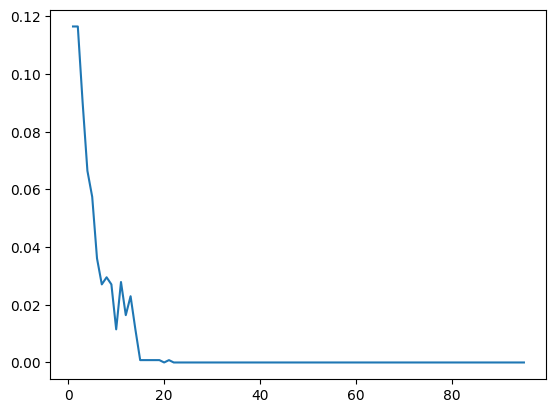

In [32]:
plt.plot(range(1, 96), error_rates)

## Creating New Model Selected by Elbow Method

In [33]:
new_model = AdaBoostClassifier(n_estimators=15)

In [34]:
new_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=15)

### Prediction and Evaluation

In [35]:
new_predictions = new_model.predict(X_test)

In [36]:
new_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06666667, 0.06666667,
       0.        , 0.        , 0.13333333, 0.        , 0.        ,
       0.        , 0.        , 0.06666667, 0.2       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
features = pd.DataFrame(index=X.columns, data=new_model.feature_importances_, columns=['Importance'])
important_features = features[features['Importance'] > 0]
important_features

Importance
odor_c                        0.066667
odor_f                        0.066667
odor_n                        0.133333
gill-spacing_w                0.066667
gill-size_n                   0.200000
stalk-shape_t                 0.066667
stalk-surface-above-ring_k    0.066667
ring-type_p                   0.066667
spore-print-color_r           0.066667
spore-print-color_w           0.066667
population_v                  0.133333

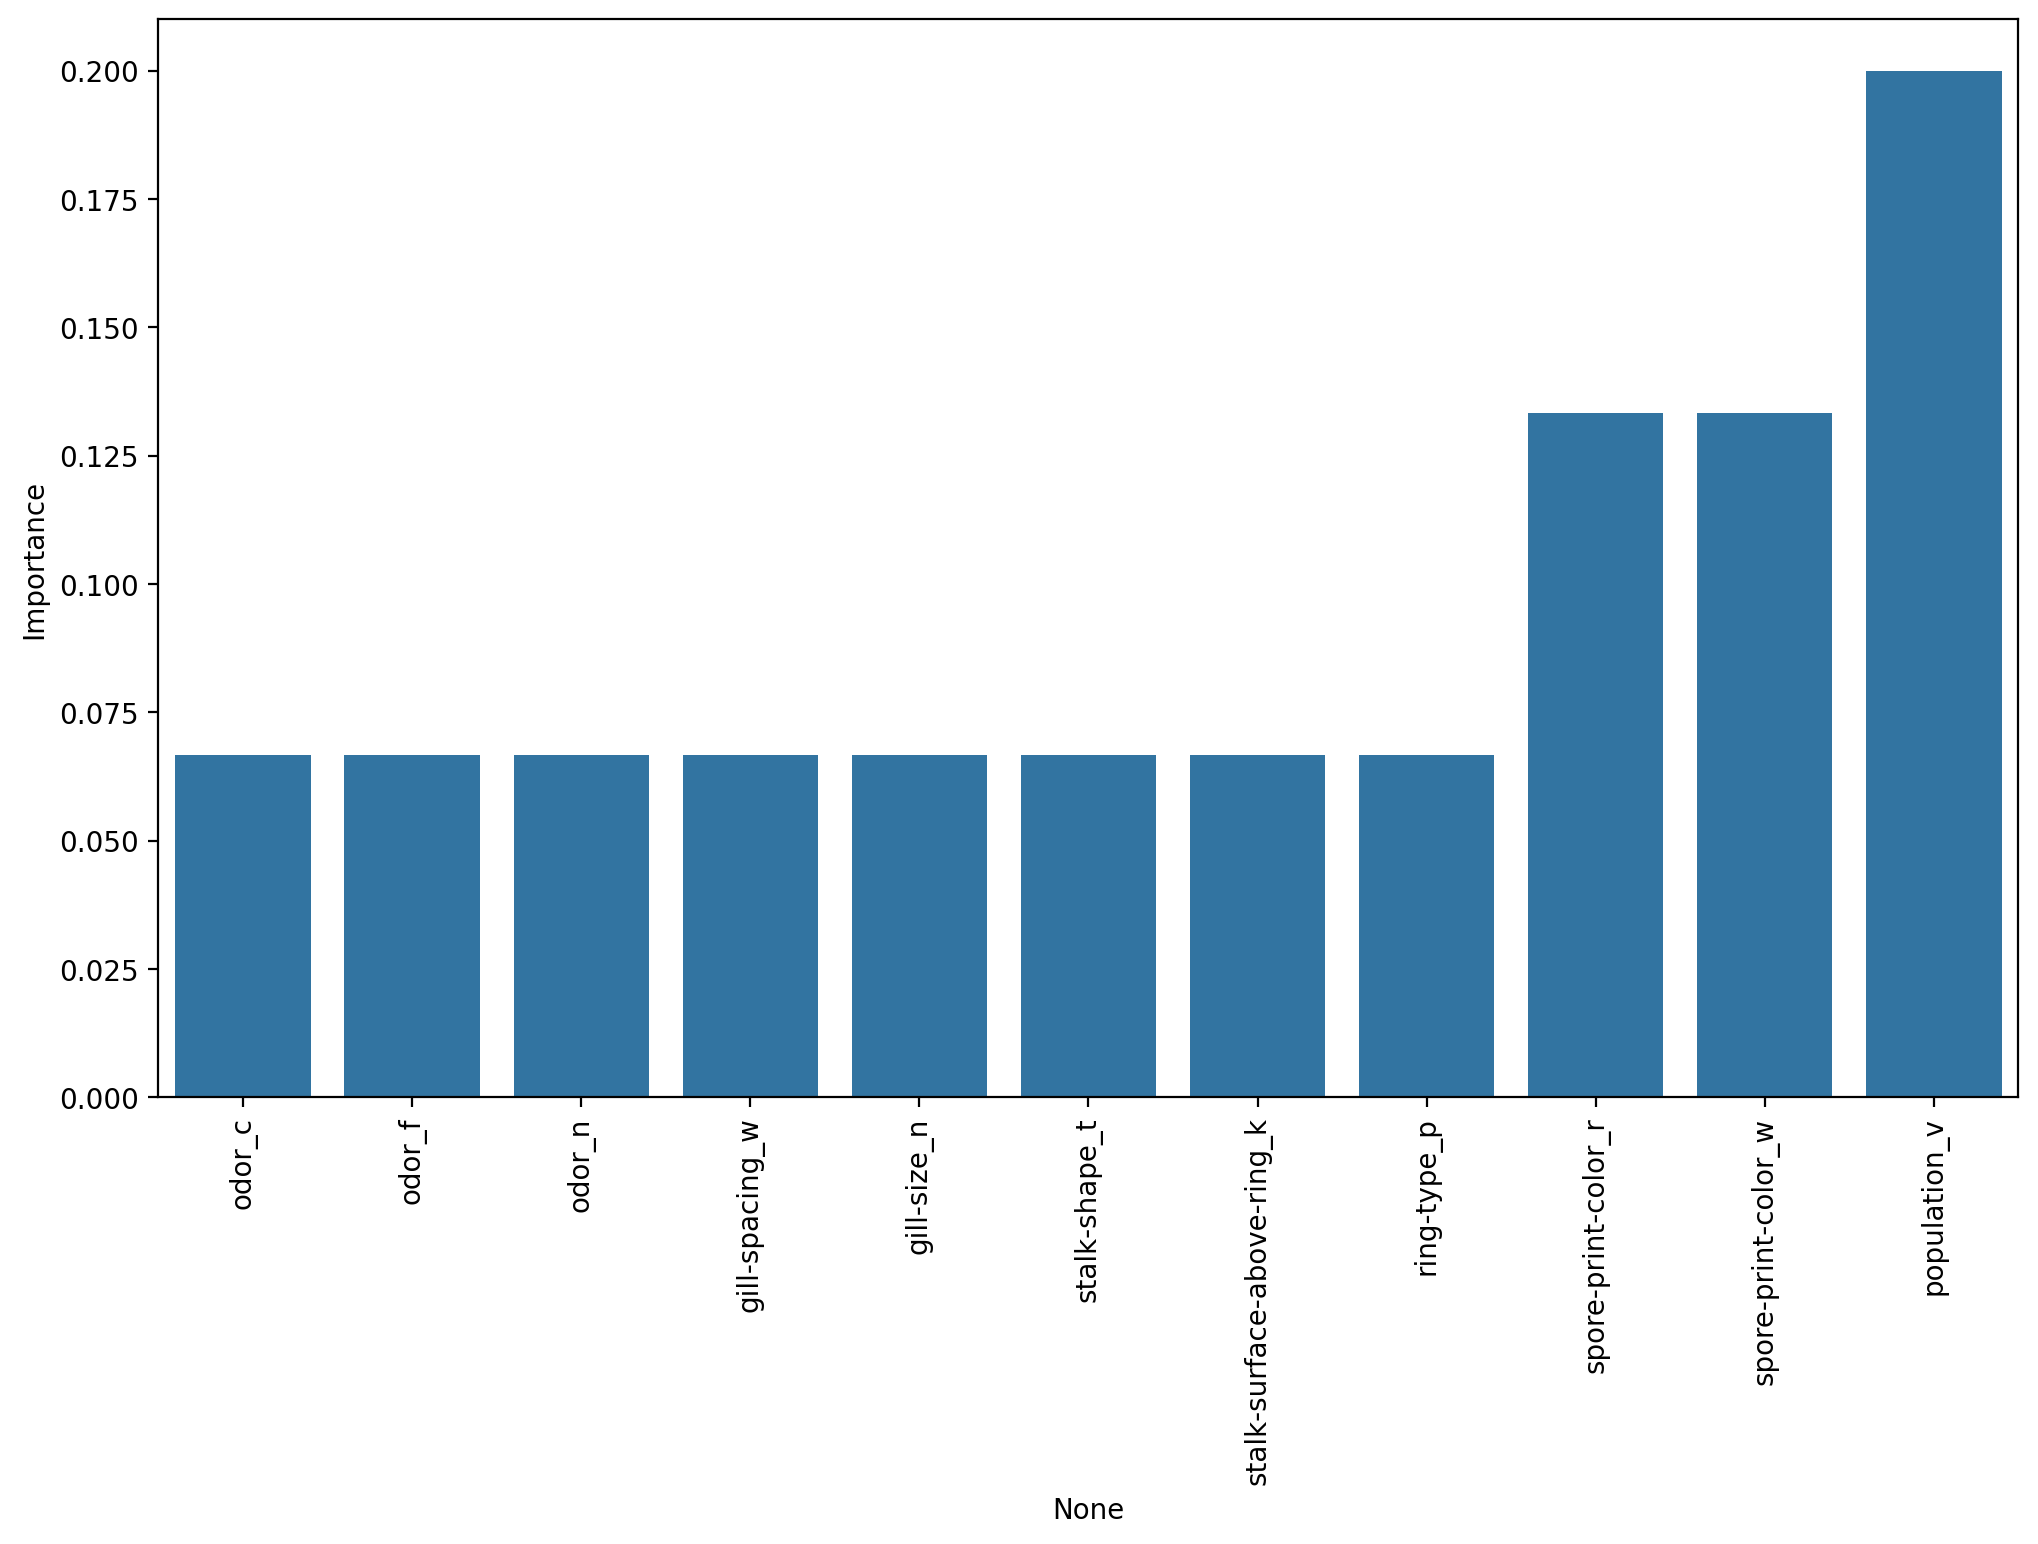

In [38]:
plt.figure(figsize=(12,7), dpi=200)
sns.barplot(data=important_features.sort_values('Importance'), x=important_features.index, y='Importance')
plt.xticks(rotation=90);

In [39]:
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



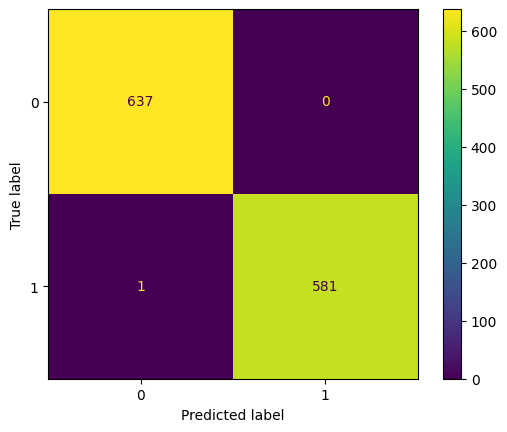

In [40]:
matrix = confusion_matrix(y_test, new_predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()